In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df=pd.read_csv("/content/train.csv",index_col=0)
test_df=pd.read_csv("/content/test.csv",index_col=0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


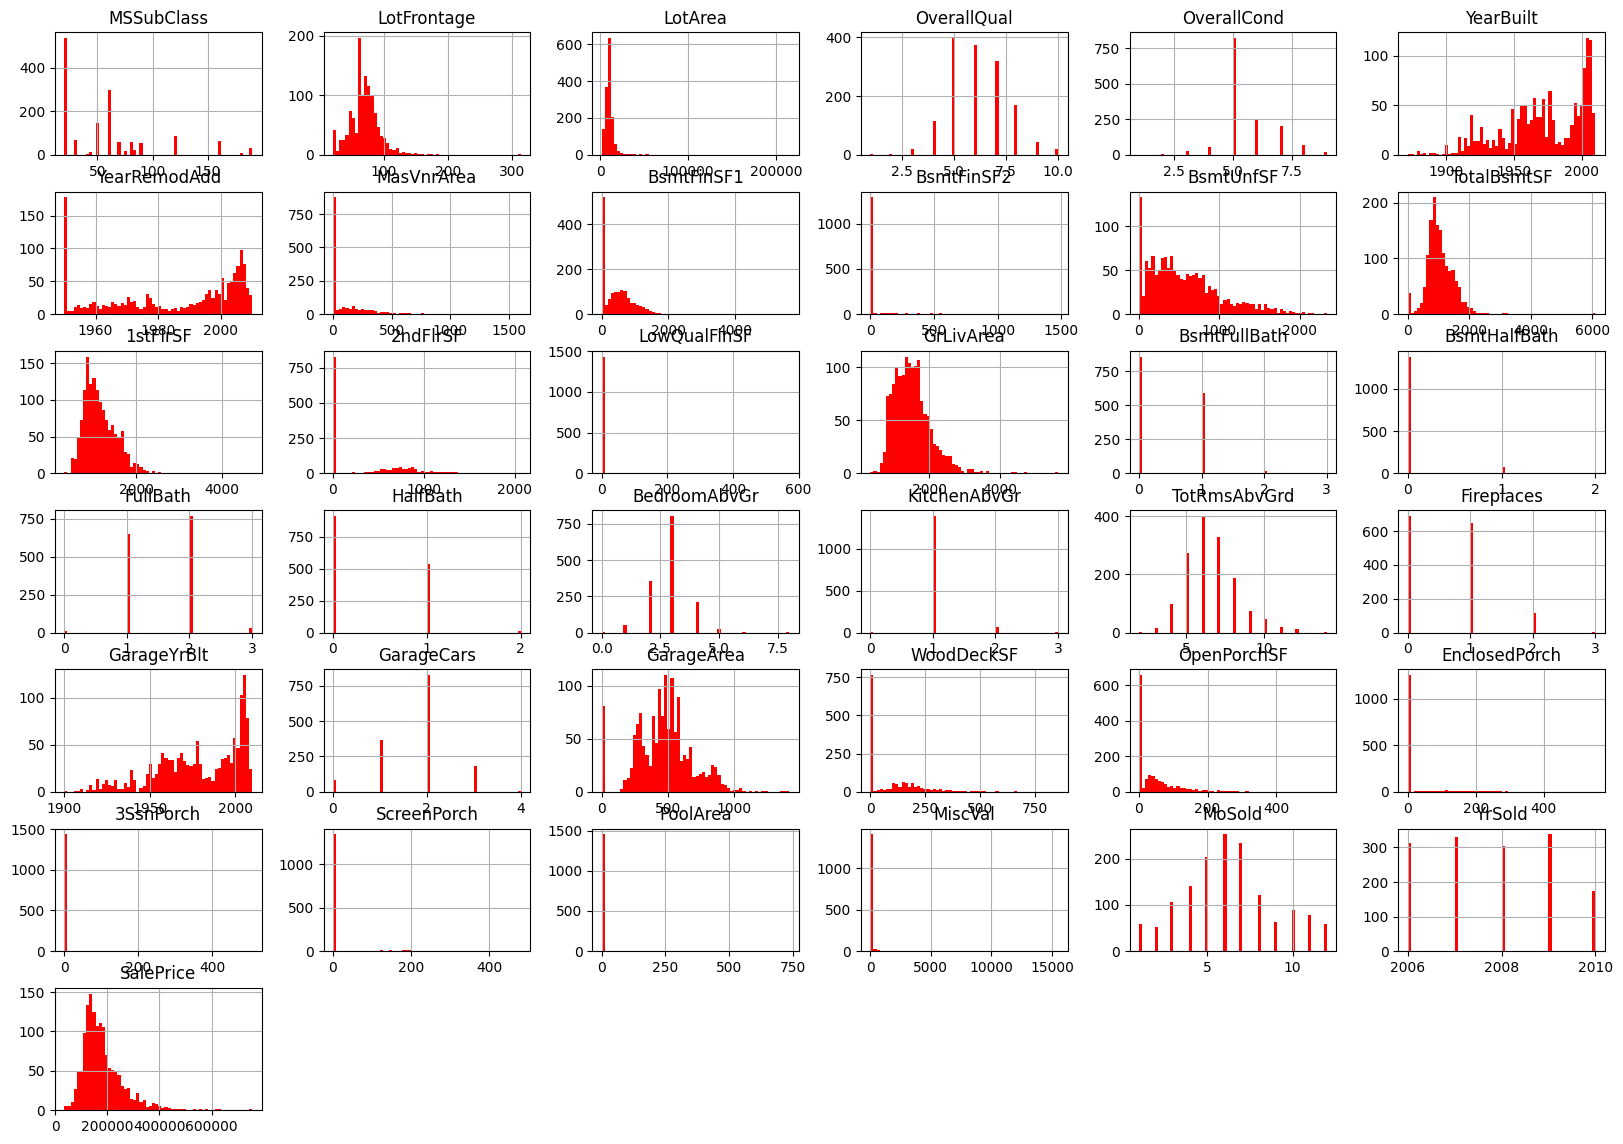

In [6]:
import matplotlib.pyplot as plt

train_df.hist(bins=60, figsize=(20,14),color='r');plt.show()

In [8]:
# columns with null values
train_col_null = train_df.columns[train_df.isnull().any()==True].tolist()
# null values in these columns
train_df[train_col_null].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


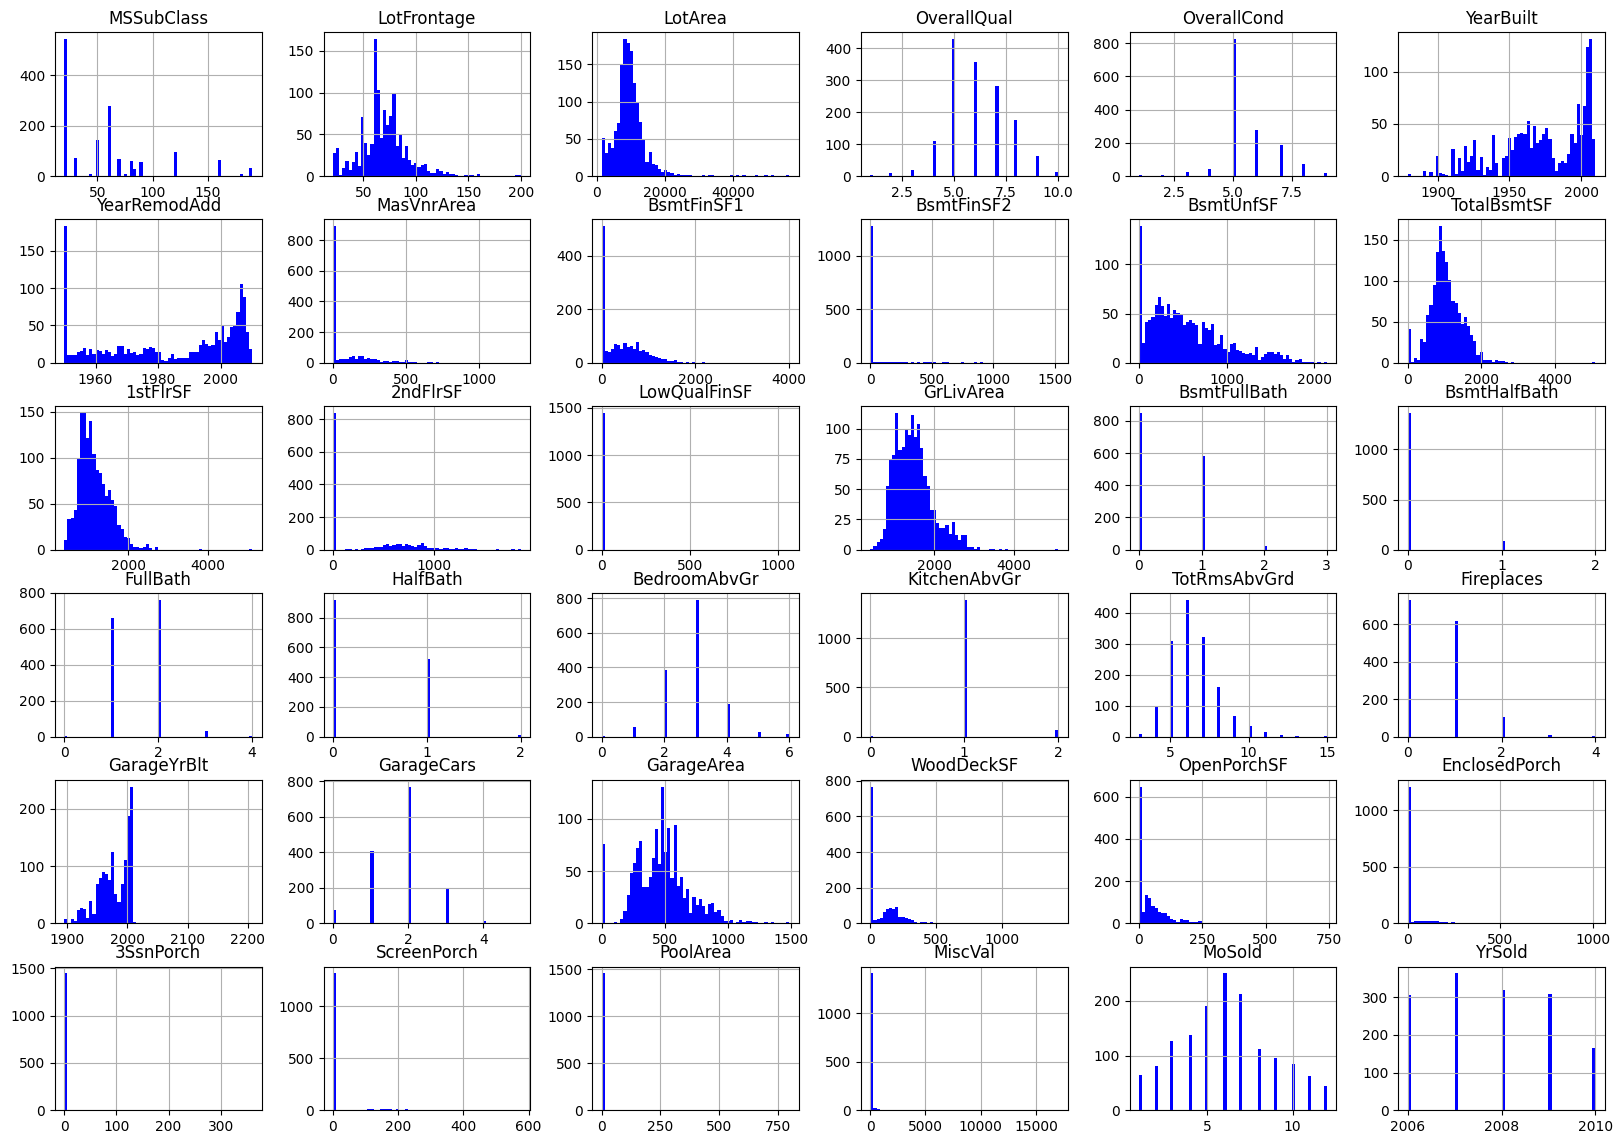

In [45]:
test_df.hist(bins=60, figsize=(20,14),color='b');plt.show()

In [11]:
# columns with null values
test_col_null = test_df.columns[test_df.isnull().any()==True].tolist()
# null values in these columns
test_df[test_col_null].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

<ipython-input-12-df877ab56838>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice']);


Skewness: 1.882876
Kurtosis: 6.536282


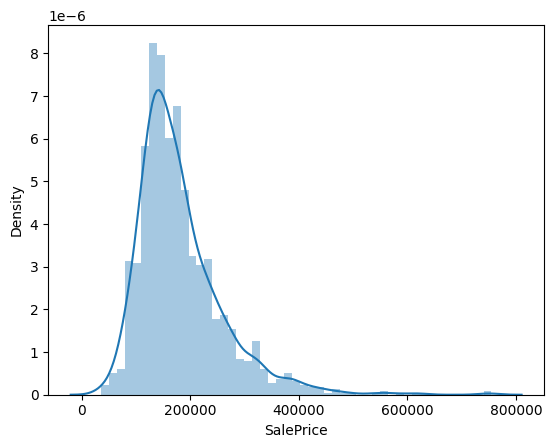

In [12]:
import seaborn as sns
sns.distplot(train_df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

In [13]:
train_df.duplicated().sum() , test_df.duplicated().sum()

(0, 0)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<ipython-input-15-85a92b5d6ce1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap="RdBu")


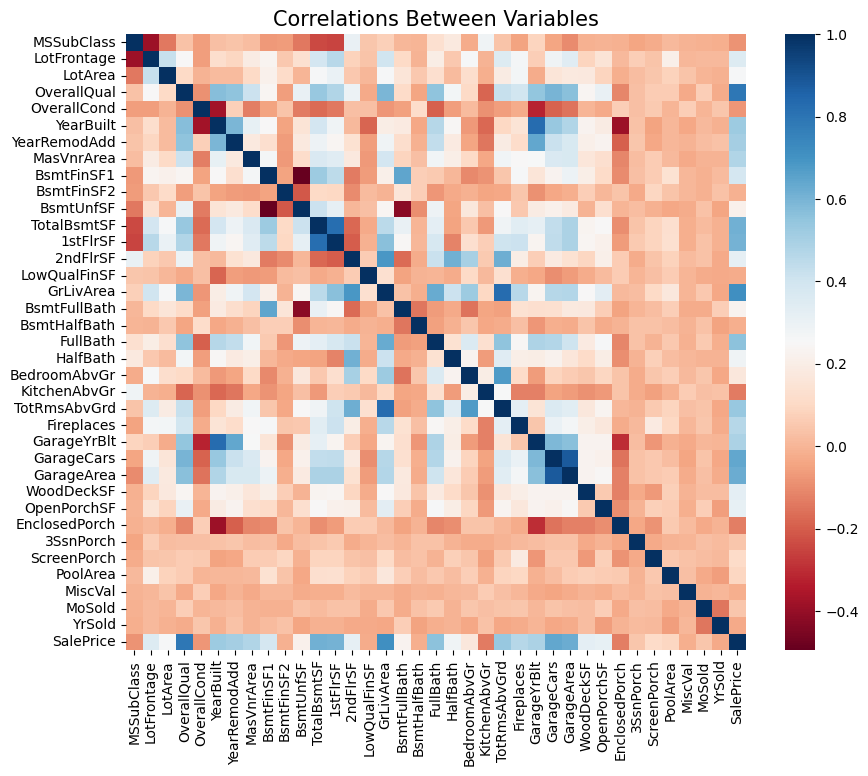

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [16]:
important_num_cols = list(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"]>0.50) | (train_df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

train_df = train_df[important_cols]

<ipython-input-16-f0103df00227>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  important_num_cols = list(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"]>0.50) | (train_df.corr()["SalePrice"]<-0.50)].index)


In [17]:
train_df.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

In [18]:
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

In [19]:
X = pd.get_dummies(X, columns=cat_cols)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler()
important_num_cols.remove("SalePrice")
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [21]:
X.shape , y.shape

((1460, 41), (1460,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [24]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

# **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
model_LogisticR = LogisticRegression()
model_LogisticR.fit(X_train, y_train)
y_pred = model_LogisticR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_LogisticR)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LogisticRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 33247.150684931505
MSE: 2916105854.7534246
RMSE: 54000.98012771087
R2 Score: 0.619819838689387
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

RMSE Cross-Validation: 54179.45780452136


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-26-751571aaeab7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
model_LinearR = LinearRegression()
model_LinearR.fit(X_train, y_train)
y_pred = model_LinearR.predict(X_test)

In [28]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_LinearR)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23652.270547945205
MSE: 1427653813.359589
RMSE: 37784.30644274934
R2 Score: 0.8138731294085156
------------------------------
RMSE Cross-Validation: 12567177654274.092


<ipython-input-28-001a8a6c34d8>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **Ridge Regression**

In [29]:
from sklearn.linear_model import Ridge
model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)

In [30]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_Ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23691.238183772384
MSE: 1462606561.5047555
RMSE: 38244.03955526606
R2 Score: 0.8093162504439136
------------------------------
RMSE Cross-Validation: 35724.35862556678


<ipython-input-30-229ad30cdee6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **Support Vector Machine(SVM)**

In [31]:
from sklearn.svm import SVC
model_SVM=SVC()
model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)

In [32]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_SVM)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVM","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 44391.36643835616
MSE: 6182699299.003425
RMSE: 78630.14243280642
R2 Score: 0.19394571599703136
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RMSE Cross-Validation: 73119.45514353432


<ipython-input-32-064eee4f2e3d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree=DecisionTreeRegressor()
model_DecisionTree.fit(X_train, y_train)
y_pred = model_DecisionTree.predict(X_test)

In [34]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_DecisionTree)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "DecisionTree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 25205.712328767124
MSE: 1459515417.7579908
RMSE: 38203.604774392574
R2 Score: 0.8097192507418499
------------------------------
RMSE Cross-Validation: 41972.99274860627


<ipython-input-34-4f86a826ee88>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **Random Forest**

In [35]:
from sklearn.ensemble import RandomForestRegressor
model_RandomForest=RandomForestRegressor(n_estimators=100)
model_RandomForest.fit(X_train, y_train)
y_pred = model_RandomForest.predict(X_test)

In [36]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_RandomForest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForest","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18441.541978962818
MSE: 1027788346.8041911
RMSE: 32059.138272950993
R2 Score: 0.8660046106199304
------------------------------
RMSE Cross-Validation: 31521.109789497867


<ipython-input-36-4a3a525a11c8>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **XGBoost Regression**

In [38]:
from xgboost import XGBRegressor
model_xgb =  XGBRegressor(n_estimators=100, learning_rate=0.07)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [39]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

print("-"*30)
rmse_cross_val = rmse_cv(model_RandomForest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGB","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17942.498394691782
MSE: 923935682.4678688
RMSE: 30396.310342998357
R2 Score: 0.8795441474702683
------------------------------
RMSE Cross-Validation: 31392.49604736381


<ipython-input-39-8ba7df85d5c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


# **Artificial Nural Network (ANN)**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [41]:
import tensorflow as tf

model_ANN=Sequential([
    Dense(300,activation='relu'),
    Dense(300,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [42]:
model_ANN.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=["mae"])

In [43]:
model_ANN.fit(X_train,y_train,batch_size=64,epochs = 10)


Epoch 1/10
19/19 [==============================] - 1s 5ms/step - loss: 38885261312.0000 - mae: 181440.6719
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 38885220352.0000 - mae: 181440.5469
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 38885220352.0000 - mae: 181440.5469
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 38885224448.0000 - mae: 181440.5156
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 38885220352.0000 - mae: 181440.5625
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 38885220352.0000 - mae: 181440.5469
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 38885220352.0000 - mae: 181440.5469
Epoch 8/10
19/19 [==============================] - 0s 5ms/step - loss: 38885220352.0000 - mae: 181440.5469
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: 38885220352.0000 - mae: 181440.5625
Epoch 10/10
19/19 [=========

# **Model Comparison**

In [44]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGB,17942.498395,9.239357e+08,30396.310343,0.879544,3.139250e+04
5,RandomForest,18441.541979,1.027788e+09,32059.138273,0.866005,3.152111e+04
2,Ridge,23691.238184,1.462607e+09,38244.039555,0.809316,3.572436e+04
4,DecisionTree,25205.712329,1.459515e+09,38203.604774,0.809719,4.197299e+04
0,LogisticRegression,33247.150685,2.916106e+09,54000.980128,0.619820,5.417946e+04
3,SVM,44391.366438,6.182699e+09,78630.142433,0.193946,7.311946e+04
1,LinearRegression,23652.270548,1.427654e+09,37784.306443,0.813873,1.256718e+13
